In [185]:
import numpy as np
import scipy
from scipy.signal import correlate
from scipy.io.wavfile import read
from matplotlib import pyplot
from matplotlib.pyplot import plot as plt

# Question 1

In [171]:
def crossCorr(x, y):
    # z = crossCorr(x, y)
    x=x-np.mean(x)
    x=x/np.abs(x).max()
    y=y-np.mean(y)
    y=y/np.abs(y).max()
    z = correlate(x,y)
    return z

In [172]:
def loadSoundFile(filename):
    # x = loadSoundFile(filename) 
    _, x = read(filename)
    return x[:,0]

In [173]:
def question1():
    snare = loadSoundFile("snare.wav")
    drum_loop = loadSoundFile("drum_loop.wav")
    correlation=crossCorr(snare,drum_loop)
    plt(correlation)
    pyplot.title('Cross correlated signal')
    pyplot.xlabel('Sample')
    pyplot.ylabel('Cross correlation')
    pyplot.savefig('results/01-correlation.png')

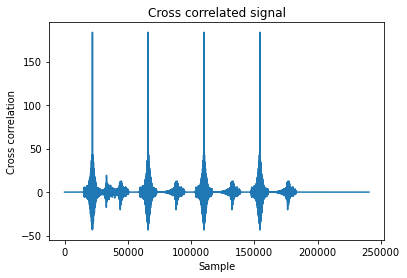

In [174]:
question1()

# Question 2

In [193]:
def findSnarePosition(snareFilename,drumloopFilename):
    # pos = findSnarePosition(snareFilename, drumloopFilename) 
    snare=loadSoundFile(snareFilename)
    drum_loop=loadSoundFile(drumloopFilename)
    correlation=crossCorr(snare,drum_loop)
    correlation=abs(correlation)
    # look within one standard deviation of the max value
    pos = list(np.where(correlation > np.max(correlation)-np.std(correlation)))
    
    with open('results/02-snareLocation.txt', 'w') as f:
        for index in pos:
            f.write('%s\n' % index)
        
    return pos

In [194]:
pos=findSnarePosition("snare.wav","drum_loop.wav")